# life_expectancy Exploration 
## Unicef Life expectancy 
## 1970 - 2021

## Imports and static variables

In [12]:
import altair  as alt
import pandas as pd
import altair as alt
from vega_datasets import data

In [13]:
regions_to_exclude = ["World",
                        "Sub-Saharan Africa",
                        "West and Central Africa",
                        "Eastern and Southern Africa",
                        "Middle East and North Africa",
                        "South Asia",
                        "East Asia and Pacific",
                        "Latin America and Caribbean",
                        "North America",
                        "Europe and Central Asia",
                        "Eastern Europe and Central Asia",
                        "Western Europe",
                        "Least developed countries"
                        ]

In [14]:
rename_countries_for_lookup = {
        'China, Hong Kong SAR': 'Hong Kong',
        'Channel Islands' : 'Jersey',
        'Republic of Korea' : 'Korea,Republic of',
        'Virgin Islands U.S.' : 'Virgin Islands,U.S.',
        'Other, non specified' : 'nan',
        'Czechia' : 'Czech Republic',
        'Curaçao' : 'Netherlands Antilles',
        'Iran (Islamic Republic of)' : 'Iran,Islamic Republic of',
        'North Macedonia' : 'Macedonia,the former Yugoslav Republic of',
        'State of Palestine' : 'Palestinian Territory,Occupied',
        'Cabo Verde' : 'Cape Verde',
        "Democratic People's Republic of Korea" : "Korea,Democratic People's Republic of",
        'Venezuela (Bolivarian Republic of)' : 'Venezuela,Bolivarian Republic of',
        'Republic of Moldova' : 'Moldova,Republic of',
        'Bolivia (Plurinational State of)' : 'Bolivia,Plurinational State of',
        'Micronesia (Federated States of)' : 'Micronesia,Federated States of',
        'United Republic of Tanzania' : 'Tanzania,United Republic of',
        'Democratic Republic of the Congo' : 'Congo,the Democratic Republic of the',
        'Eswatini' : 'Swaziland'}

## Read Data

In [32]:
life_expectancy = pd.read_excel("data/LE.xlsx")
# life_expectancy.set_index('TIME_PERIOD', inplace=True)
life_expectancy.head()


,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Observation confidentaility,LOWER_BOUND,...,WGTD_SAMPL_SIZE,OBS_FOOTNOTE,SERIES_FOOTNOTE,DATA_SOURCE,SOURCE_LINK,CUSTODIAN,Time period activity related to when the data are collected,REF_PERIOD,COVERAGE_TIME,Current age
0,Afghanistan,Life expectancy,Total,1970,37.409,Units,Years,NaN,NaN,NaN,...,NaN,"201 countries/areas from WPP2019, UNICEF aggre...",NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,Total,1971,37.930,Units,Years,NaN,NaN,NaN,...,NaN,"201 countries/areas from WPP2019, UNICEF aggre...",NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Life expectancy,Total,1972,38.461,Units,Years,NaN,NaN,NaN,...,NaN,"201 countries/areas from WPP2019, UNICEF aggre...",NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Life expectancy,Total,1973,39.003,Units,Years,NaN,NaN,NaN,...,NaN,"201 countries/areas from WPP2019, UNICEF aggre...",NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Life expectancy,Total,1974,39.558,Units,Years,NaN,NaN,NaN,...,NaN,"201 countries/areas from WPP2019, UNICEF aggre...",NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
population = pd.read_excel("data/POP.xlsx")
# population.set_index('TIME_PERIOD', inplace=True)
population.head()

,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Observation confidentaility,LOWER_BOUND,...,WGTD_SAMPL_SIZE,OBS_FOOTNOTE,SERIES_FOOTNOTE,DATA_SOURCE,SOURCE_LINK,CUSTODIAN,Time period activity related to when the data are collected,REF_PERIOD,COVERAGE_TIME,Current age
0,Afghanistan,Total population,Total,1970,11174,Thousands,Persons,NaN,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Total population,Total,1971,11475,Thousands,Persons,NaN,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Total population,Total,1972,11791,Thousands,Persons,NaN,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Total population,Total,1973,12109,Thousands,Persons,NaN,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Total population,Total,1974,12413,Thousands,Persons,NaN,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN


## Join Tables

In [34]:
merged_data =  life_expectancy.merge(
                        population,
                        how='left', 
                        on=['TIME_PERIOD','Geographic area'])

In [35]:
merged_data = merged_data[["Geographic area", "TIME_PERIOD", "OBS_VALUE_x", "OBS_VALUE_y"]].rename(
                            columns={"Geographic area":"country", "TIME_PERIOD":"year", "OBS_VALUE_x":"average_life_expectancy", "OBS_VALUE_y":"population"}
                        ).set_index(
                            "year"
                        )
merged_data.population = merged_data.population.astype(int)
merged_data.population *= 1000
merged_data["year"] = merged_data.index.values
merged_data.head()

,country,average_life_expectancy,population,year
year,,,,
1970,Afghanistan,37.409,11174000,1970
1971,Afghanistan,37.930,11475000,1971
1972,Afghanistan,38.461,11791000,1972
1973,Afghanistan,39.003,12109000,1973
1974,Afghanistan,39.558,12413000,1974


country
Sub-Saharan Africa    AxesSubplot(0.125,0.125;0.775x0.755)
Western Europe        AxesSubplot(0.125,0.125;0.775x0.755)
World                 AxesSubplot(0.125,0.125;0.775x0.755)
Yemen                 AxesSubplot(0.125,0.125;0.775x0.755)
Zambia                AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe              AxesSubplot(0.125,0.125;0.775x0.755)
Name: average_life_expectancy, dtype: object

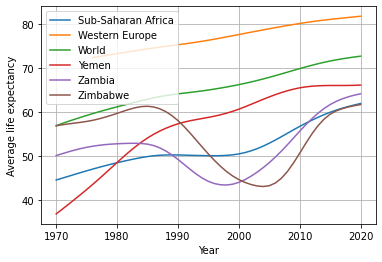

In [36]:
merged_data.tail(300).groupby("country")["average_life_expectancy"].plot(kind="line", xlabel="Year", ylabel="Average life expectancy", grid=True, legend=True) # (x="TIME_PERIOD", y="OBS_VALUE")

country
Afghanistan            AxesSubplot(0.125,0.125;0.775x0.755)
Albania                AxesSubplot(0.125,0.125;0.775x0.755)
Algeria                AxesSubplot(0.125,0.125;0.775x0.755)
Angola                 AxesSubplot(0.125,0.125;0.775x0.755)
Antigua and Barbuda    AxesSubplot(0.125,0.125;0.775x0.755)
Argentina              AxesSubplot(0.125,0.125;0.775x0.755)
Name: population, dtype: object

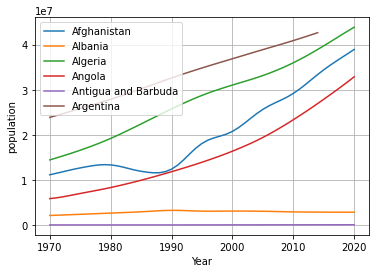

In [37]:
merged_data.head(300).groupby("country")["population"].plot(kind="line", xlabel="Year", ylabel="population", grid=True, legend=True)

In [38]:
# Drop regions and so on
merged_data.set_index('country', inplace=True)

In [39]:
# exclude reginos
merged_data.drop(regions_to_exclude, axis=0, inplace=True)


In [40]:
country_codes = pd.read_csv("data/country_lookup.csv")
country_shapes = alt.topo_feature(data.world_110m.url, 'countries')

In [41]:
merged_data.rename(index = rename_countries_for_lookup, inplace=True)
merged_data.drop(country_codes.Country.values, axis=0, inplace=False, errors="ignore").index.values

array(['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], dtype=object)

In [42]:
merged_data

,average_life_expectancy,population,year
country,,,
Afghanistan,37.409,11174000,1970
Afghanistan,37.930,11475000,1971
Afghanistan,38.461,11791000,1972
Afghanistan,39.003,12109000,1973
Afghanistan,39.558,12413000,1974
...,...,...,...
Zimbabwe,60.294,14030000,2016
Zimbabwe,60.812,14237000,2017
Zimbabwe,61.195,14439000,2018


In [43]:
merged_data = merged_data.merge(country_codes, left_index=True, right_on=["Country"]).rename(columns={'Numeric code': 'id'})

In [44]:
merged_data

,average_life_expectancy,population,year,Country,Alpha-2 code,Alpha-3 code,id,Latitude (average),Longitude (average)
0,37.409,11174000,1970,Afghanistan,AF,AFG,4,33.0,65.0
0,37.930,11475000,1971,Afghanistan,AF,AFG,4,33.0,65.0
0,38.461,11791000,1972,Afghanistan,AF,AFG,4,33.0,65.0
0,39.003,12109000,1973,Afghanistan,AF,AFG,4,33.0,65.0
0,39.558,12413000,1974,Afghanistan,AF,AFG,4,33.0,65.0
...,...,...,...,...,...,...,...,...,...
255,60.294,14030000,2016,Zimbabwe,ZW,ZWE,716,-20.0,30.0
255,60.812,14237000,2017,Zimbabwe,ZW,ZWE,716,-20.0,30.0
255,61.195,14439000,2018,Zimbabwe,ZW,ZWE,716,-20.0,30.0
255,61.490,14645000,2019,Zimbabwe,ZW,ZWE,716,-20.0,30.0


In [45]:
merged_data.to_csv("data/merged_data.csv")

## Data 2020

In [10]:
merged_data_2020 = merged_data[merged_data.index == 2020].sort_values(by=["average_life_expectancy"], ascending=False)
# Sort for life expectancy
merged_data_2020.set_index('country', inplace=True)
# Drop regions like World, North America etc
merged_data_2020.drop(regions_to_exclude, axis=0, inplace=True)
merged_data_2020

,average_life_expectancy,population
country,,
"China, Hong Kong SAR",85.003,7497000
Japan,84.766,126476000
Macao,84.370,649000
Switzerland,83.921,8655000
Singapore,83.767,5850000
...,...,...
Sierra Leone,55.066,7977000
Nigeria,55.018,206140000
Lesotho,54.836,2142000


In [11]:
# calculate total years per country
merged_data_2020["total_years"] = merged_data_2020.average_life_expectancy * merged_data_2020.population
# And in total
total_years_2020 = merged_data_2020["total_years"].sum()
total_years_2020

568437642502.0

In [12]:
merged_data_2020.head(150).total_years.sum() / total_years_2020

0.8372107072207583

In [13]:
merged_data_2020.head(150).population.sum() / merged_data_2020.population.sum()

0.8115934255451509

<AxesSubplot:ylabel='Density'>

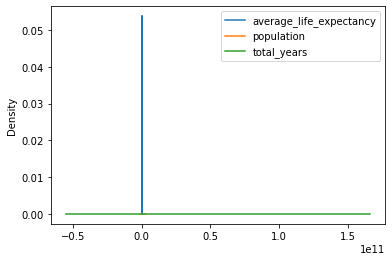

In [14]:
merged_data_2020.plot.kde()

<AxesSubplot:xlabel='country'>

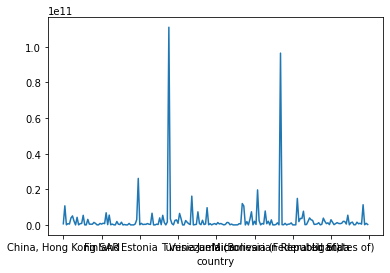

In [15]:
merged_data_2020.total_years.plot()

In [16]:
merged_data_2020.total_years

country
China, Hong Kong SAR        6.372675e+08
Japan                       1.072086e+10
Macao                       5.475613e+07
Switzerland                 7.263363e+08
Singapore                   4.900370e+08
                                ...     
Sierra Leone                4.392615e+08
Nigeria                     1.134141e+10
Lesotho                     1.174587e+08
Chad                        8.952991e+08
Central African Republic    2.592696e+08
Name: total_years, Length: 200, dtype: float64

## Map Setup

In [46]:
country_codes = pd.read_csv("data/country_lookup.csv")
country_shapes = alt.topo_feature(data.world_110m.url, 'countries')
country_shapes

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'
})

In [24]:
merged_data_2020.rename(index = rename_countries_for_lookup, inplace=True)
merged_data_2020.drop(country_codes.Country.values, axis=0, inplace=False, errors="ignore").index.values

array([1970, 1971, 1972, ..., 2018, 2019, 2020])

In [25]:
merged_data_2020.to_csv("data/merged_data.csv")

In [10]:
merged_data_2020_GEO = merged_data_2020.merge(country_codes, left_index=True, right_on=["Country"]).rename(columns={'Numeric code': 'id'})

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [20]:
map = alt.Chart(country_shapes).mark_geoshape(
    stroke='white',
    fill='#A9A9A9'
).project(
    type='mercator',
    # scale=250,
    # center=[20,55],
    # clipExtent= [[0,0], [400, 300]]
)
total_years_marks = alt.Chart(merged_data_2020_GEO).mark_circle().encode(
    longitude='Longitude (average)',
    latitude='Latitude (average)',
    size=alt.Size('total_years', legend=None),
    tooltip=['Country', 'total_years'],
).project(
    type='mercator',
    # scale=250,
    # center=[20,55],
    # clipExtent= [[0,0], [400, 300]]
)
map + total_years_marks

alt.LayerChart(...)

In [21]:
life_expectancy_marks = alt.Chart(merged_data_2020_GEO).mark_circle().encode(
    longitude='Longitude (average)',
    latitude='Latitude (average)',
    size=alt.Size('average_life_expectancy', legend=None),
    tooltip=['Country', 'average_life_expectancy'],
).project(
    type='mercator',
    # scale=250,
    # center=[20,55],
    # clipExtent= [[0,0], [400, 300]]
)
map + life_expectancy_marks

alt.LayerChart(...)

In [22]:
alt.Chart(country_shapes).mark_geoshape(
    stroke='black',
    strokeWidth=.5
).encode(
    color="average_life_expectancy:Q",
    tooltip=['Country:N', 'average_life_expectancy:Q', 'population:Q'],
).project(
    type='orthographic',
    scale=200,
    center=[0,0],
    rotate=[-20,-20,0],
    clipExtent= [[0,0], [400, 300]]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=merged_data_2020_GEO, key='id', fields=['average_life_expectancy', 'population', 'Country']))

alt.Chart(...)

In [23]:
alt.Chart(country_shapes).mark_geoshape(
    stroke='black',
    strokeWidth=0
).encode(
    color="average_life_expectancy:Q",
    tooltip=['Country:N', 'average_life_expectancy:Q', 'population:Q'],
).project(
    type='naturalEarth1',
    scale=130,
    # center=[0,0],
    rotate=[0,-30,0],
    # clipExtent= [[0,0], [400, 300]]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=merged_data_2020_GEO, key='id', fields=['average_life_expectancy', 'population', 'Country']))

alt.Chart(...)

In [24]:
alt.Chart(country_shapes).mark_geoshape(
    stroke='black',
    strokeWidth=.5
).encode(
    color="total_years:Q",
    tooltip=['Country:N', 'total_years:Q', 'population:Q'],
).project(
    type='naturalEarth1',
    scale=130,
    # center=[0,0],
    rotate=[0,-30,0],
    # clipExtent= [[0,0], [400, 300]]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=merged_data_2020_GEO, key='id', fields=['total_years', 'population', 'Country']))

alt.Chart(...)